In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score

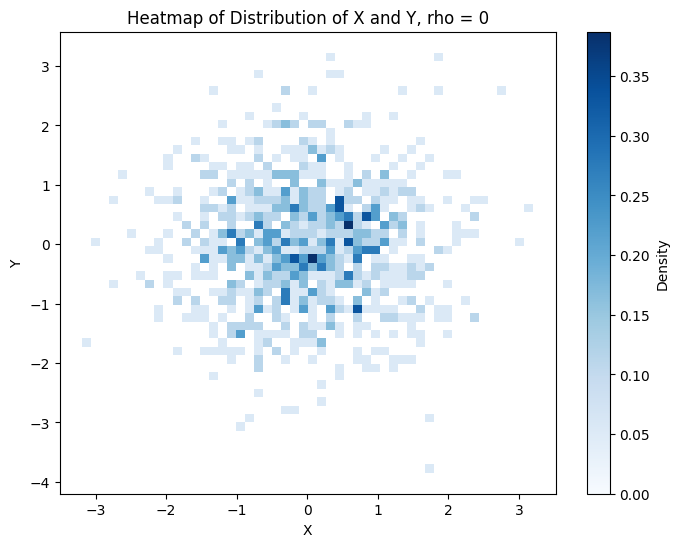

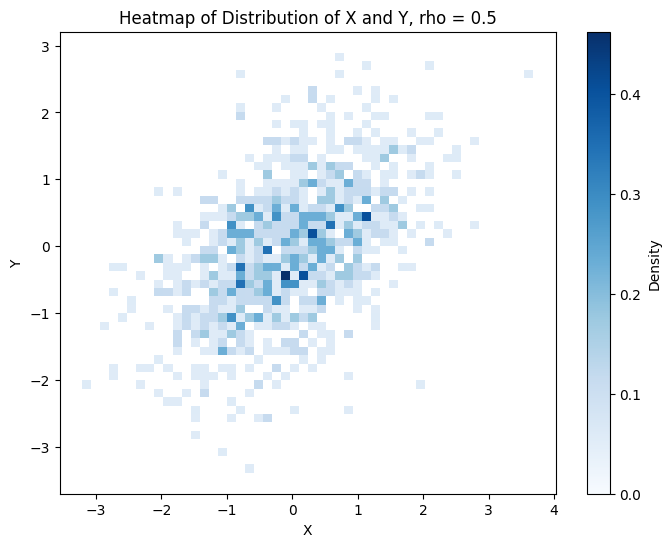

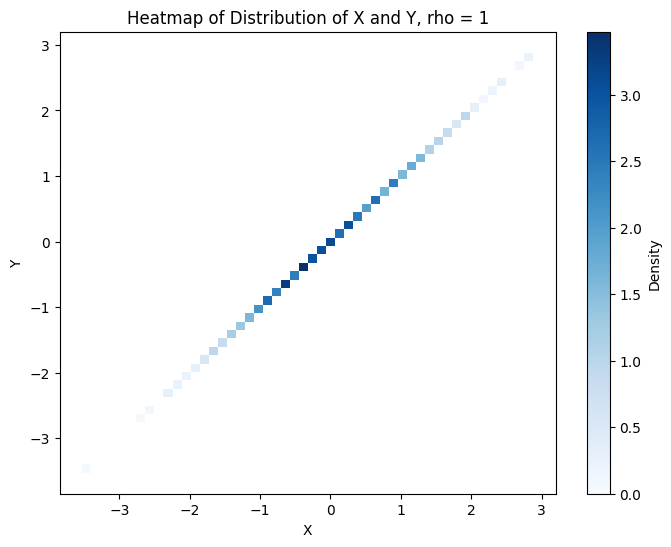

In [9]:
n = 1000
for rho in [0,0.5,1]:

    Sigma = [[1, rho],
            [rho, 1]]
    Mu = [0,0]
    X, Y = np.transpose(np.random.multivariate_normal(Mu, Sigma,n))

    plt.figure(figsize=(8, 6))
    sns.histplot(x=X, y=Y, bins=50, cmap='Blues', cbar=True, cbar_kws={'label': 'Density'}, stat="density")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Heatmap of Distribution of X and Y, rho = {rho}')
    plt.show()

In [65]:
rho = 0
Sigma = [[1, rho],
        [rho, 1]]
Mu = [0,0]
X, Y = np.transpose(np.random.multivariate_normal(Mu, Sigma,n))

xbins = np.linspace(X.min(), X.max(), 10 + 1)
ybins = np.linspace(Y.min(), Y.max(), 10 + 1)
def get_bucket(x, bins):
    for i in range(1,len(bins)):
        if x<bins[i]:
            return i
    return i+1
X_bin = [get_bucket(x, xbins) for x in X]
Y_bin = [get_bucket(y, ybins) for y in Y]

In [66]:
corr, p_val = pearsonr(X, Y)
corr

-0.004353340188711394

In [67]:

mutual_info_score(X_bin, Y_bin)

0.05330459704585597

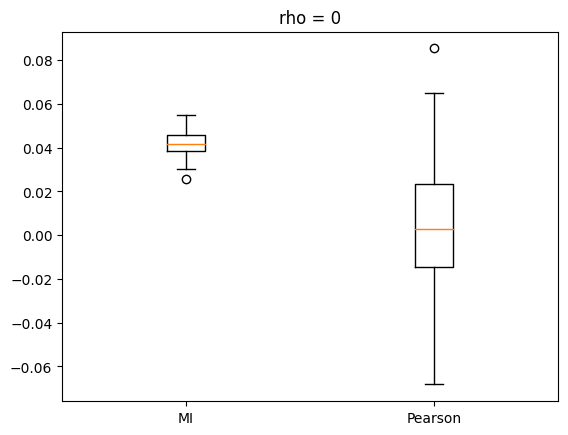

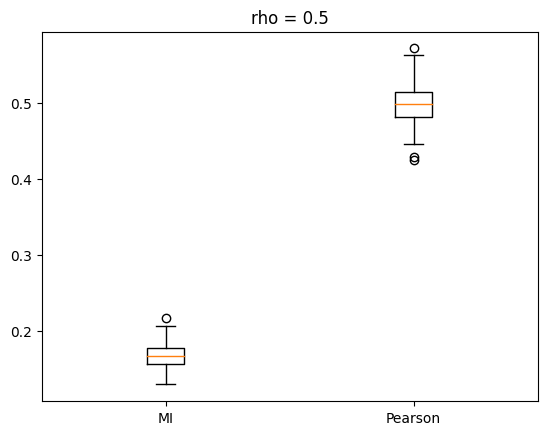

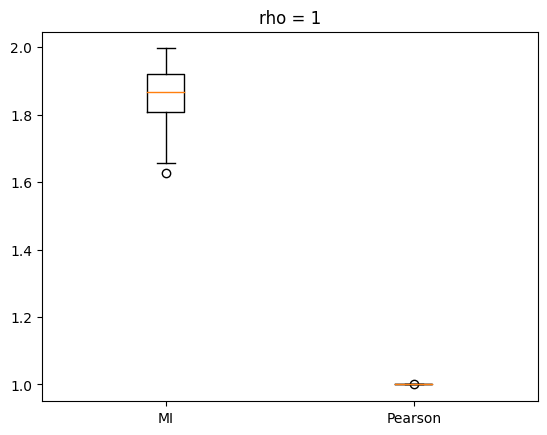

In [110]:
N = 100

M = []
P = []
for rho in [0,1/2,1]:
    MI = []
    Pearson = []
    for i in range(N):
        
        Sigma = [[1, rho],
                [rho, 1]]
        Mu = [0,0]
        X, Y = np.transpose(np.random.multivariate_normal(Mu, Sigma,n))

        xbins = np.linspace(X.min(), X.max(), 10 + 1)
        ybins = np.linspace(Y.min(), Y.max(), 10 + 1)

        X_bin = [get_bucket(x, xbins) for x in X]
        Y_bin = [get_bucket(y, ybins) for y in Y]

        corr, p_val = pearsonr(X, Y)
        MI.append(mutual_info_score(X_bin, Y_bin))
        Pearson.append(corr)
    plt.boxplot([MI, Pearson])
    plt.xticks(list(range(1,3)), ["MI", "Pearson"])
    plt.title(f"rho = {rho}")
    plt.show()
    M.append(MI)
    P.append(Pearson)

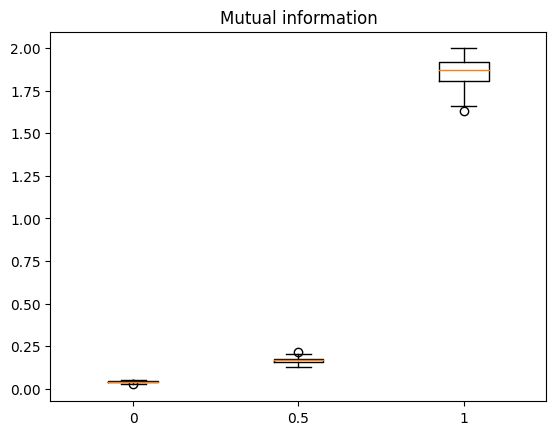

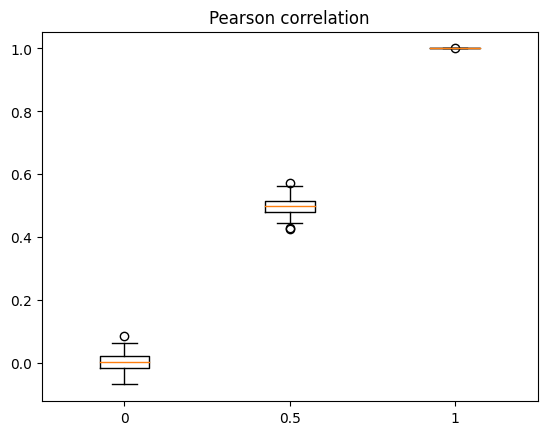

In [111]:
plt.boxplot(M)
plt.title("Mutual information")
plt.xticks(list(range(1,4)), [0,0.5,1])
plt.show()

plt.boxplot(P)
plt.title("Pearson correlation")
plt.xticks(list(range(1,4)), [0,0.5,1])
plt.show()

C:\Users\mateu\AppData\Local\Temp\ipykernel_11000\4291656371.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(list(range(1,4)), -np.log(1-np.median(P, axis=1)**2)/2, label="-log(1-r_est^2)/2")


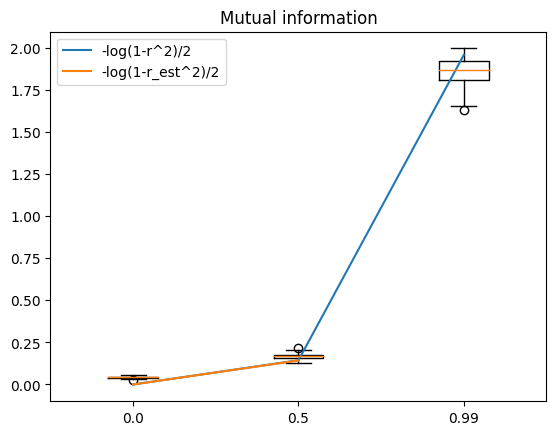

In [112]:
r = np.array([0,0.5,0.99])
plt.boxplot(M)
plt.xticks(list(range(1,4)), r)
plt.plot(list(range(1,4)), -np.log(1-r**2)/2, label="-log(1-r^2)/2")
plt.plot(list(range(1,4)), -np.log(1-np.median(P, axis=1)**2)/2, label="-log(1-r_est^2)/2")

plt.legend()
plt.title("Mutual information")


plt.show()

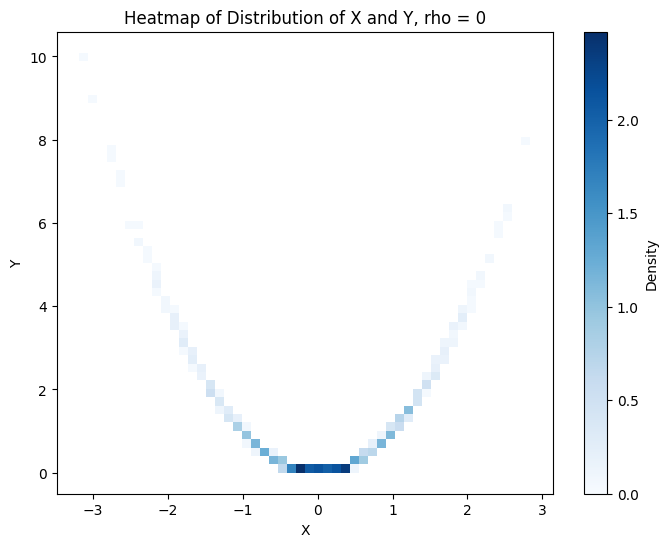

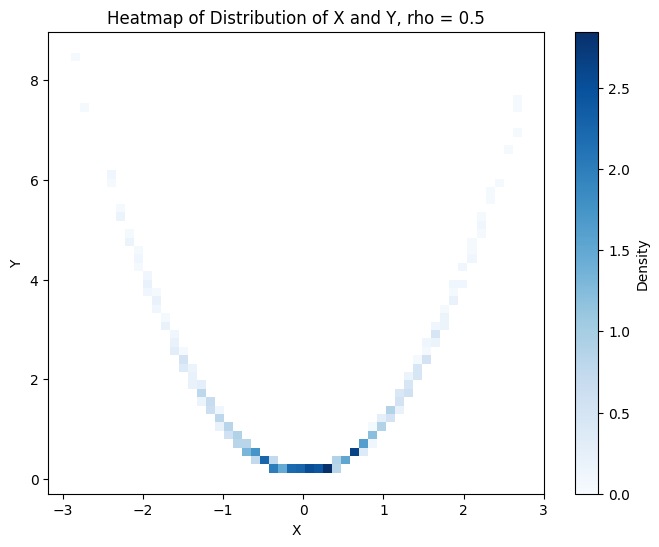

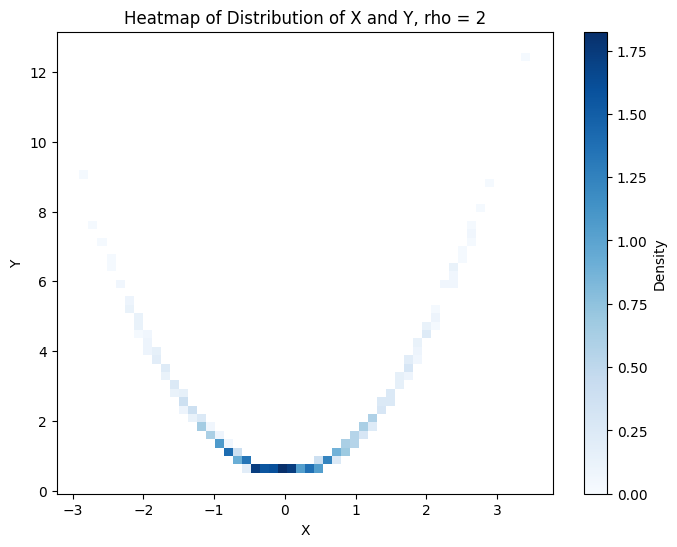

In [113]:
n = 1000
for rho in [0,0.5,2]:


    X = np.random.normal(0,1,n)
    Y = X**2 + np.random.normal(0, rho)

    plt.figure(figsize=(8, 6))
    sns.histplot(x=X, y=Y, bins=50, cmap='Blues', cbar=True, cbar_kws={'label': 'Density'}, stat="density")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Heatmap of Distribution of X and Y, rho = {rho}')
    plt.show()

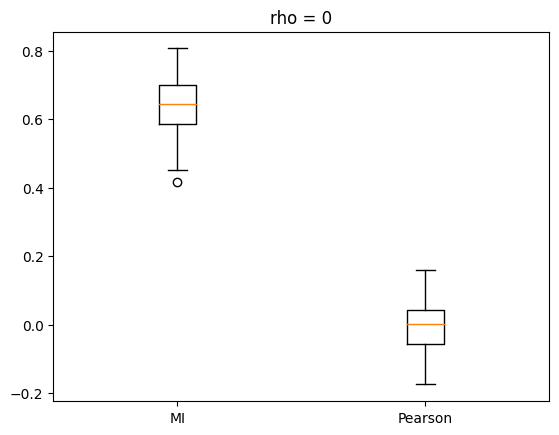

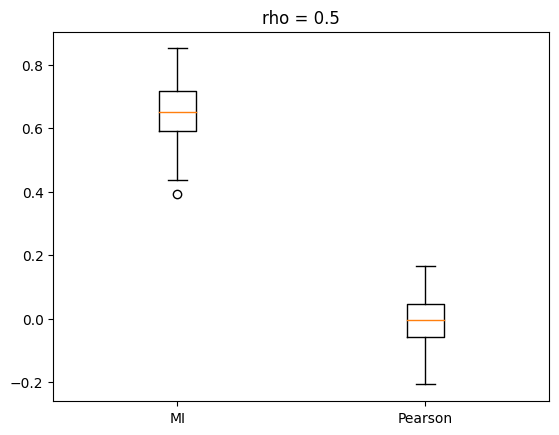

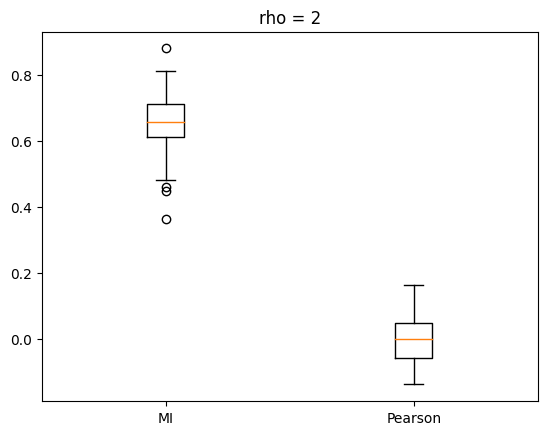

In [106]:
N = 100

M = []
P = []
for rho in [0,1/2,2]:
    MI = []
    Pearson = []
    for i in range(N):
        
        X = np.random.normal(0,1,n)
        Y = X**2 + np.random.normal(0, rho)
        
        xbins = np.linspace(X.min(), X.max(), 10 + 1)
        ybins = np.linspace(Y.min(), Y.max(), 10 + 1)

        X_bin = [get_bucket(x, xbins) for x in X]
        Y_bin = [get_bucket(y, ybins) for y in Y]

        corr, p_val = pearsonr(X, Y)
        MI.append(mutual_info_score(X_bin, Y_bin))
        Pearson.append(corr)
    plt.boxplot([MI, Pearson])
    plt.xticks(list(range(1,3)), ["MI", "Pearson"])
    plt.title(f"rho = {rho}")
    plt.show()
    M.append(MI)
    P.append(Pearson)

In [215]:
from scipy.stats import chi2

def discretisize(X):
    xbins = np.linspace(X.min(), X.max(), 10 + 1)
    return [get_bucket(x, xbins) for x in X]

def asymptotic_independence(X, Y):
    X_bin = discretisize(X)
    Y_bin = discretisize(Y)
    MI = mutual_info_score(X_bin, Y_bin)
    return 2 * len(X) * MI, chi2.cdf(2 * len(X) * MI, (len(np.unique(X_bin))-1)*(len(np.unique(Y_bin))-1)) 


In [117]:



def permutation_test(X, Y, B):
    X_bin = discretisize(X)
    Y_bin = discretisize(Y)


    MI = mutual_info_score(X_bin,Y_bin)
    s = 0
    for i in range(B):
        if MI <= mutual_info_score(np.random.permutation(X_bin),Y_bin):
            s += 1
    return (1+s)/(1+B)



### Permutation

In [123]:
B = 100

X = np.random.normal(0,1,n)
Y = X**2 + np.random.normal(0, 1/2, n)
print(permutation_test(X, Y, B))


X = np.random.normal(0,1,n)
Y = np.random.normal(0, 1,n)
print(permutation_test(X, Y, B))

rho = 1
Sigma = [[1, rho],
        [rho, 1]]
Mu = [0,0]
X, Y = np.transpose(np.random.multivariate_normal(Mu, Sigma,n))
print(permutation_test(X, Y, B))

0.009900990099009901
0.13861386138613863
0.009900990099009901


In [216]:
n =1000

X = np.random.normal(0,1,n)
Y = X**2 + np.random.normal(0, 1/2, n)
print(asymptotic_independence(X, Y)[1])


X = np.random.normal(0,2,n)
Y = np.random.normal(0, 2,n)
print(asymptotic_independence(X, Y)[1])

rho = 1
Sigma = [[1, rho],
        [rho, 1]]
Mu = [0,0]
X, Y = np.transpose(np.random.multivariate_normal(Mu, Sigma,n))
print(asymptotic_independence(X, Y)[1])

1.0
0.43025958535008196
1.0
